In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
history_final = np.load('history_final.npy', allow_pickle=True).item()
y_test_final = np.load('y_true_final.npy')
y_pred_final = np.load('y_pred_final.npy')
y_pred_final_og = np.load('y_pred_final_olddata.npy')
y_test_final_og = np.load('y_true_final_olddata.npy')
print(history_final.keys())

dict_keys(['AUC', 'Precision', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_accuracy', 'val_loss'])


<Figure size 640x480 with 0 Axes>

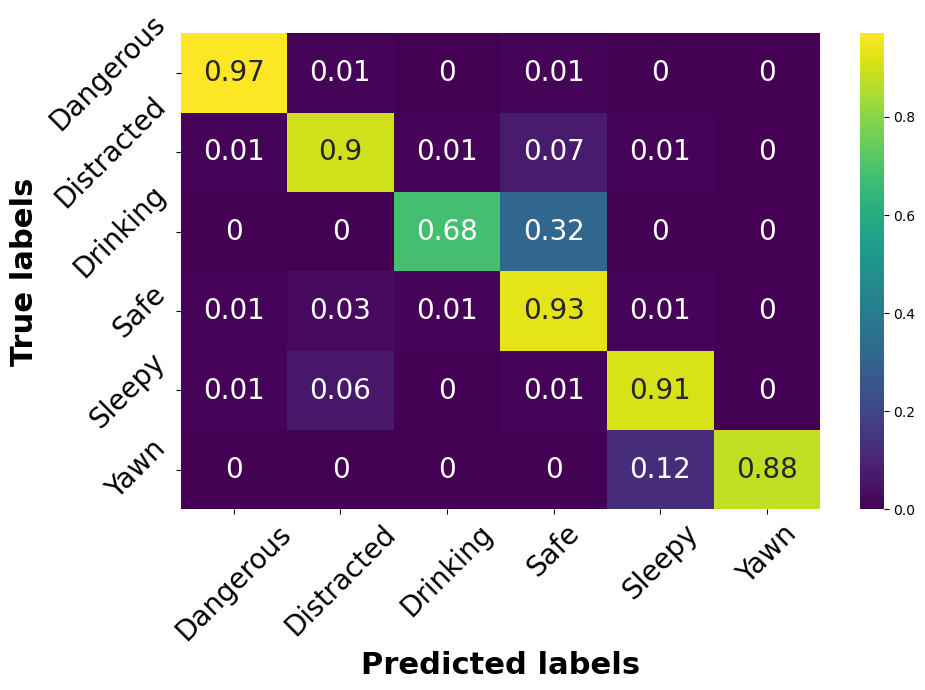

In [72]:
plt.clf()
plt.figure(tight_layout=True, figsize=(10, 7))
labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn']
cm = confusion_matrix(y_test_final_og, y_pred_final_og)
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, cmap = 'viridis')
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(rotation=45, fontsize = 20)
plt.xlabel('Predicted labels', fontsize = 22, fontweight='bold')
plt.ylabel('True labels', fontsize = 22, fontweight='bold')
# plt.xtickparams(labelsize=12)
plt.savefig('conf_matr/confusion_matrix_final_og_norm.png')

<Figure size 640x480 with 0 Axes>

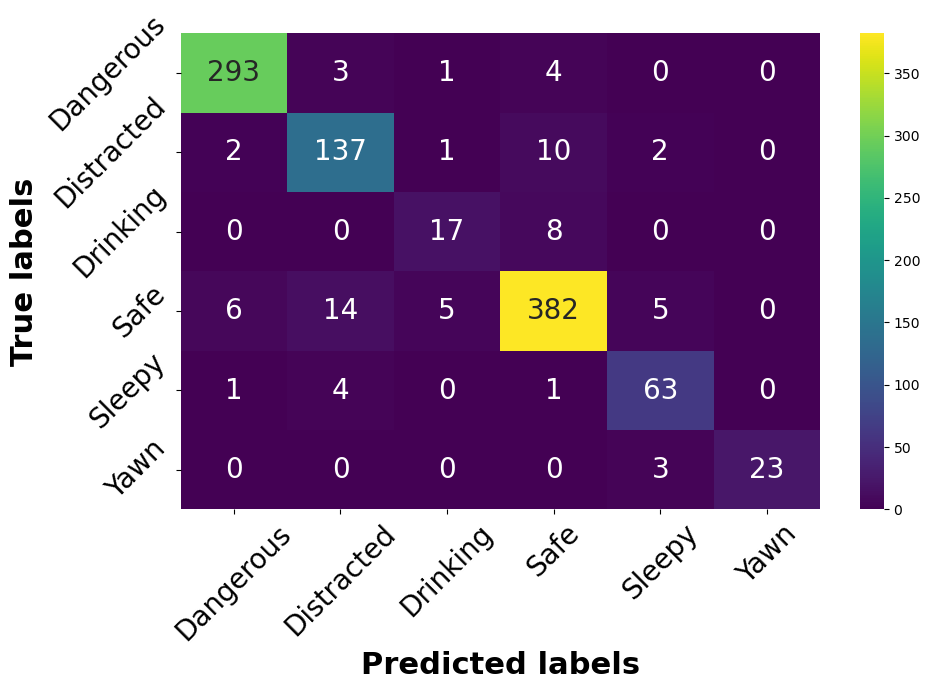

In [73]:
plt.clf()
plt.figure(tight_layout=True, figsize=(10, 7))
labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn']
cm = confusion_matrix(y_test_final_og, y_pred_final_og)
# cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, cmap = 'viridis')
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(rotation=45, fontsize = 20)
plt.xlabel('Predicted labels', fontsize = 22, fontweight='bold')
plt.ylabel('True labels', fontsize = 22, fontweight='bold')
plt.savefig('conf_matr/confusion_matrix_final_og.png')

<Figure size 640x480 with 0 Axes>

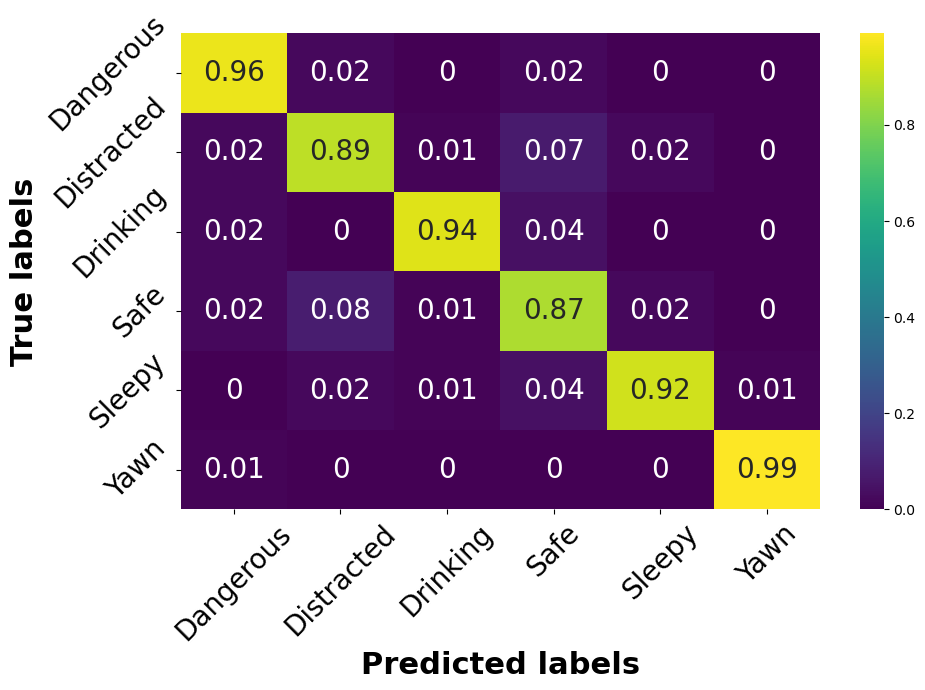

In [74]:
plt.clf()
plt.figure(tight_layout=True, figsize=(10, 7))
labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn']
cm = confusion_matrix(y_test_final, y_pred_final)
cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, cmap = 'viridis')
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(rotation=45, fontsize = 20)
plt.xlabel('Predicted labels', fontsize = 22, fontweight='bold')
plt.ylabel('True labels', fontsize = 22, fontweight='bold')
plt.savefig('conf_matr/confusion_matrix_final_aug_norm.png')


<Figure size 640x480 with 0 Axes>

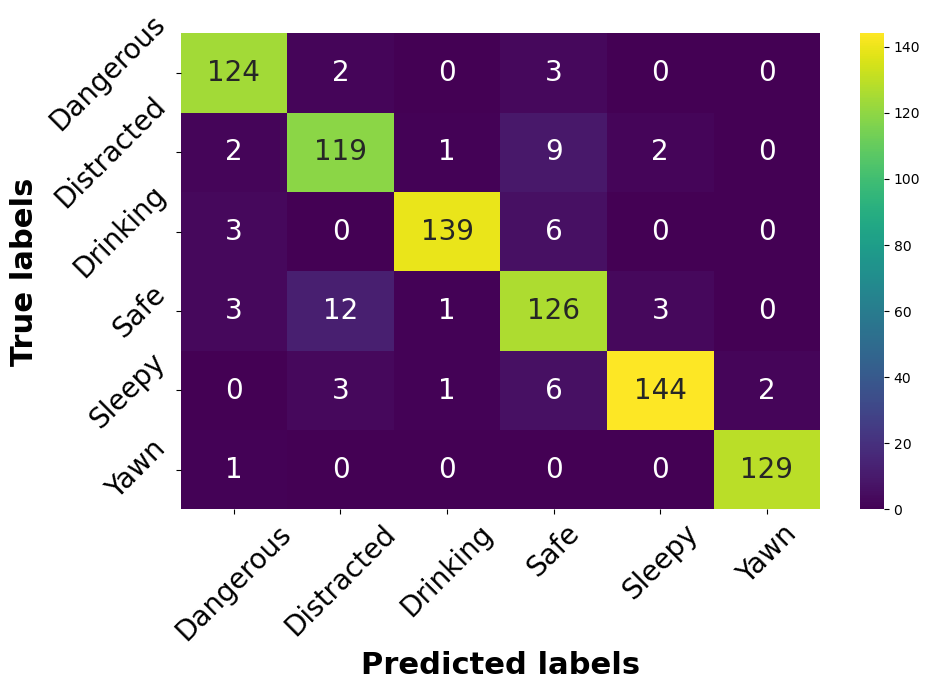

In [71]:
plt.clf()

plt.figure(tight_layout=True, figsize=(10, 7))
labels = ['Dangerous', 'Distracted', 'Drinking', 'Safe', 'Sleepy', 'Yawn']
cm = confusion_matrix(y_test_final, y_pred_final)
# cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
#plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, cmap = 'viridis')
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(rotation=45, fontsize = 20)
plt.xlabel('Predicted labels', fontsize = 22, fontweight='bold')
plt.ylabel('True labels', fontsize = 22, fontweight='bold')
# plt.show()
plt.savefig('conf_matr/confusion_matrix_final_aug.png')

In [26]:
crp = classification_report(y_test_final, y_pred_final, target_names=labels)
print(crp)
crp = classification_report(y_test_final, y_pred_final, target_names=labels, output_dict=True)
print(crp)

              precision    recall  f1-score   support

   Dangerous       0.93      0.96      0.95       129
  Distracted       0.88      0.89      0.88       133
    Drinking       0.98      0.94      0.96       148
        Safe       0.84      0.87      0.85       145
      Sleepy       0.97      0.92      0.94       156
        Yawn       0.98      0.99      0.99       130

    accuracy                           0.93       841
   macro avg       0.93      0.93      0.93       841
weighted avg       0.93      0.93      0.93       841

{'Dangerous': {'precision': 0.9323308270676691, 'recall': 0.9612403100775194, 'f1-score': 0.9465648854961832, 'support': 129.0}, 'Distracted': {'precision': 0.875, 'recall': 0.8947368421052632, 'f1-score': 0.8847583643122676, 'support': 133.0}, 'Drinking': {'precision': 0.9788732394366197, 'recall': 0.9391891891891891, 'f1-score': 0.9586206896551724, 'support': 148.0}, 'Safe': {'precision': 0.84, 'recall': 0.8689655172413793, 'f1-score': 0.8542372881355

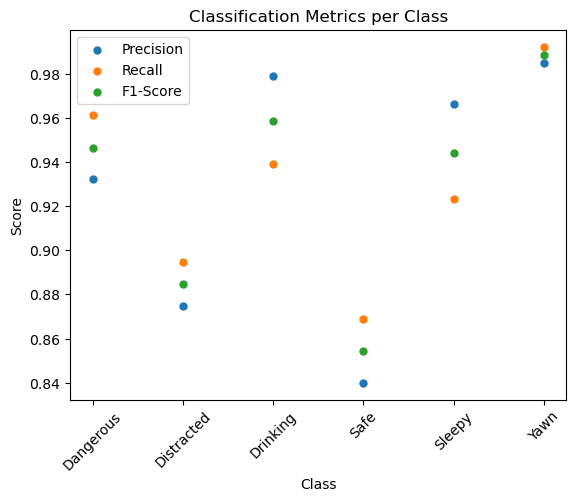

In [27]:
#plot scores against classes
precision = [crp[label]['precision'] for label in labels]
recall = [crp[label]['recall'] for label in labels]
f1_score = [crp[label]['f1-score'] for label in labels]

# Plotting
plt.figure()
plt.scatter(labels, precision, label='Precision', marker = 'o', s = 25)
plt.scatter(labels, recall, label='Recall', marker = 'o', s = 25)
plt.scatter(labels, f1_score, label='F1-Score', marker = 'o', s = 25)
plt.legend()
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.title('Classification Metrics per Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.show()


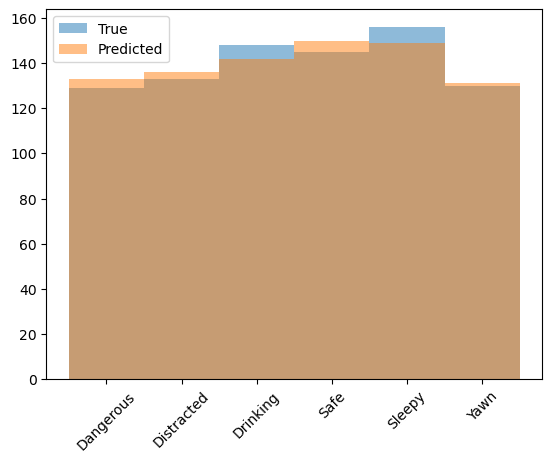

In [28]:
num = plt.hist(y_test_final, bins=6, alpha=0.5, label='True')
edges = num[1]
plt.hist(y_pred_final, bins=6, alpha=0.5, label='Predicted')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.xticks(bin_centers, labels, rotation=45)
plt.legend(loc='upper left')
plt.show()

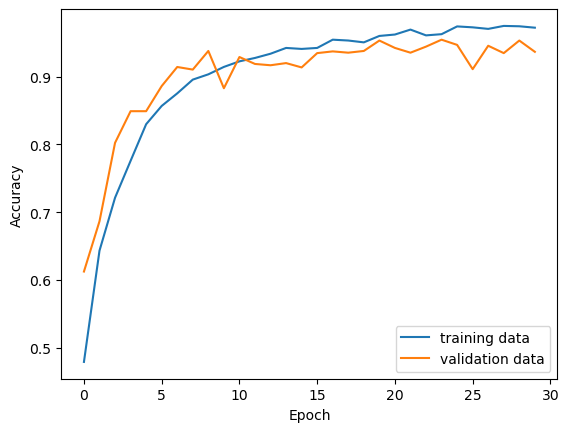

In [29]:
#plot performance from history
plt.plot(history_final['accuracy'], label='training data')
plt.plot(history_final['val_accuracy'], label='validation data')
# plt.plot(history_final['val_Precision'], label='validation data precision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


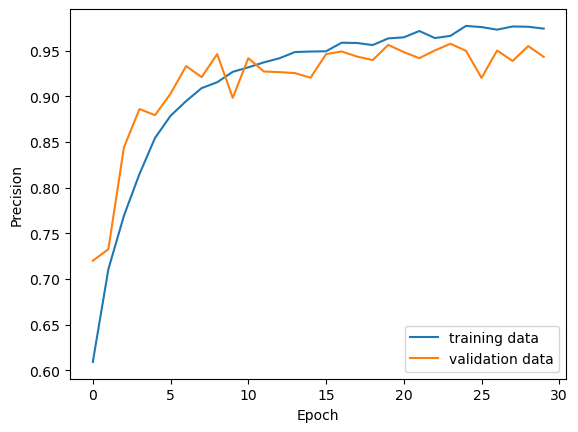

In [30]:
plt.plot(history_final['Precision'], label='training data')
plt.plot(history_final['val_Precision'], label='validation data')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend()


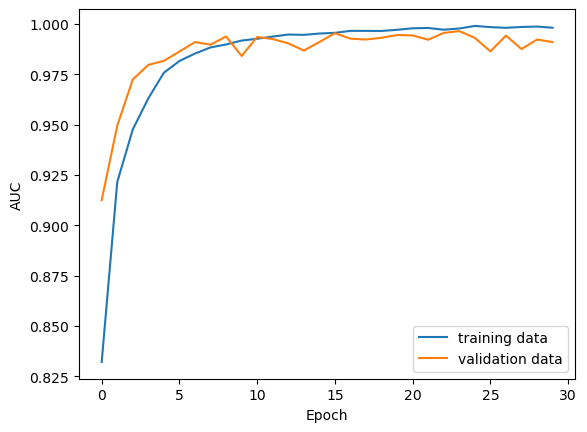

In [31]:
plt.plot(history_final['AUC'], label='training data')
plt.plot(history_final['val_AUC'], label='validation data')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend()

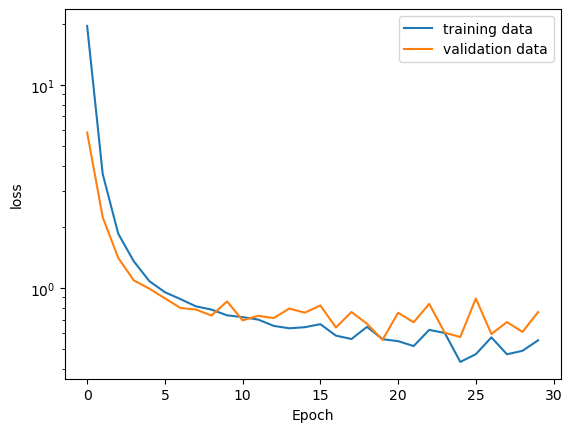

In [32]:
plt.plot(history_final['loss'], label='training data')
plt.plot(history_final['val_loss'], label='validation data')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.legend()

In [76]:
y_pred_bef = np.load('y_pred_index.npy')
y_true_bef = np.load('y_test_index.npy')
history_bef = pd.read_csv('history (2).csv')

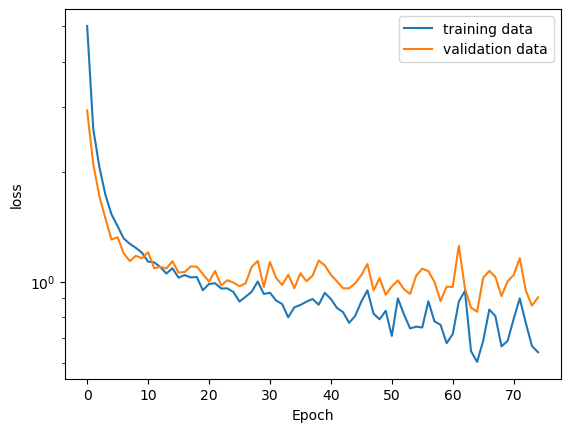

In [79]:
loss = history_bef['loss']
val_loss = history_bef['val_loss']      
plt.plot(loss, label='training data')       
plt.plot(val_loss, label='validation data')
plt.legend()
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.yscale('log')